---

# CSCI 3202, Fall 2023
# Homework 2.2 (50 pts)
# Due: Wed, October 11 at 11:59 pm

<br> 

### Your name: Derick Sayavong

<br> 

#### Importing necessary libraries below
* Make sure this file is in the aima-python repository, so that search.py is accessible to the notebook

#### Downloading necessary files (.pkl)
* graph_dict.pkl
* graph_pos.pkl
* map_dict.pkl
* map_pos.pkl
* obstacle_pos.pkl

##### Please make sure all these files are available to this notebook in the aima-python repository

As, in the previous assignment, please use the `write your code here` phrase to know that code has to be written in that cell.

In [2]:
!pip install --upgrade networkx

In [3]:
from search import *
from notebook import show_map, display_visual

import types
import math

import numpy as np
from numpy import array
import pickle as pkl

import networkx as nx
import random
import matplotlib.pyplot as plt

In this homework, we will be working with depth first search (DFS), breadth first search (BFS), uniform cost search (UCS) and A* search with heuristics on graphs. 

### Problem 1: Solve on paper (10 pts)

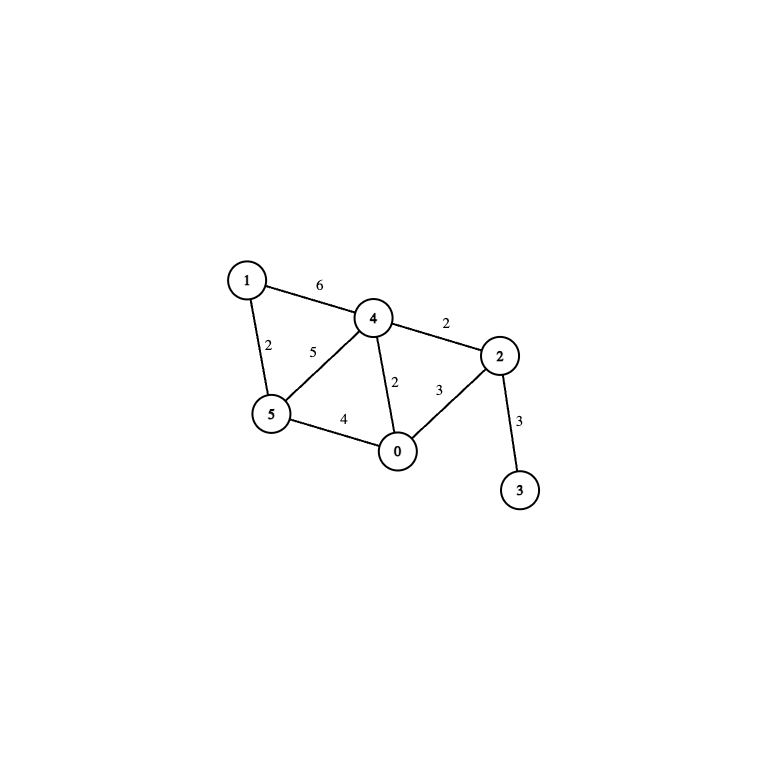

#### Heuristics table 
| Node |  h(n) |
| :- | :-: |
| 0 | 4
| 1 | 10
| 2 | 3
| 3 | 0
| 4 | 4
| 5 | 9

Find the path from start state to goal state for the above given graph in both UCS and A* search, on paper. Consider 1 to be the starting vertex and the goal vertex to be 3. The table contains the heuristic / estimated value to goal from each node. Read the following instructions completely and solve the problem:-
1. Write down the final path to reach the goal from start state (1) 
2. At each step, when deciding which node to pick if having same value of estimated cost, pick the lower numbered node first
3. Show the frontier, distances calculated for estimated values, and the visited nodes at each step for both search algorithms as shown in class lectures
3. Take a picture of the full working done on paper, insert the images into the below cell/s
4. Briefly explain how the traversal occurs in the perspective of what is the frontier, which node is being currently explored and what nodes have already been explored at each step.

<img src="https://drive.google.com/uc?id=16ywelph7KbjhZpVVigMhFg5sD-ow3YwM" alt="Image Description" width="500"/>


<img src="https://drive.google.com/uc?id=175D1ELXRc0LJ7U8OD8sFNd2pSabfhI01" alt="Image Description" width="500"/>

Add explanations here

### Problem 2: Visualize and compare (10 pts)

#### For the Problem 2, read through these instructions thoroughly
* Use Vertex 1 as initial node
* Use Vertex 10 as goal node
* GraphProblem(initial_state, goal_state, graph) 
     - where initial_state is the start state of the problem
     - where goal_state is the goal state of the problem
     - graph is the aima-python Graph / UndirectedGraph instance

#### Loading pickle file for graph.locations and graph dictionary 
Pickle files are a file format to store Python objects on disk and then read them back as Python variables.
<br>
##### There are mainly two methods used:
 - pickle.load is a function used to read data from a .pkl file into a given Python variable
 - pickle.dump is a function used to dump Python object into a .pkl file

In [4]:
# Fetching the node positions of the graph for our `graph.locations` attribute
with open("graph_pos.pkl", "rb") as f:
    pos = pkl.load(f)

In [5]:
# Fetching the graph data structure we have defined, into a variable named `graph_dict`
with open("graph_dict.pkl", "rb") as f:
    graph_dict = pkl.load(f)

#### Printing the pos and graph_dict below to verify if they look right

In [6]:
pos

{'Vertex 0': array([ 80., 400.]),
 'Vertex 1': array([210., 180.]),
 'Vertex 2': array([ 50., 260.]),
 'Vertex 3': array([370., 420.]),
 'Vertex 4': array([100., 120.]),
 'Vertex 5': array([470., 150.]),
 'Vertex 6': array([ 30., 350.]),
 'Vertex 7': array([400., 380.]),
 'Vertex 8': array([ 70., 130.]),
 'Vertex 9': array([380.,   0.]),
 'Vertex 10': array([ 50., 310.]),
 'Vertex 11': array([450., 210.]),
 'Vertex 12': array([200., 160.]),
 'Vertex 13': array([200.,  50.]),
 'Vertex 14': array([420.,   0.]),
 'Vertex 15': array([180., 480.]),
 'Vertex 16': array([440., 110.]),
 'Vertex 17': array([330., 210.]),
 'Vertex 18': array([490., 130.]),
 'Vertex 19': array([390.,  20.]),
 'Vertex 20': array([480., 190.]),
 'Vertex 21': array([420., 360.]),
 'Vertex 22': array([400., 240.]),
 'Vertex 23': array([440., 140.]),
 'Vertex 24': array([440., 190.]),
 'Vertex 25': array([180., 410.]),
 'Vertex 26': array([ 10., 220.]),
 'Vertex 27': array([100., 330.]),
 'Vertex 28': array([ 40., 130

In [7]:
graph_dict

{'Vertex 0': {'Vertex 13': 30},
 'Vertex 13': {'Vertex 0': 30, 'Vertex 4': 12, 'Vertex 27': 29},
 'Vertex 1': {'Vertex 29': 31},
 'Vertex 29': {'Vertex 1': 31,
  'Vertex 24': 21,
  'Vertex 25': 26,
  'Vertex 28': 48},
 'Vertex 2': {'Vertex 3': 35},
 'Vertex 3': {'Vertex 2': 35, 'Vertex 15': 19},
 'Vertex 15': {'Vertex 3': 19, 'Vertex 12': 32, 'Vertex 22': 32},
 'Vertex 4': {'Vertex 13': 12},
 'Vertex 5': {'Vertex 8': 40},
 'Vertex 8': {'Vertex 5': 40, 'Vertex 14': 37},
 'Vertex 6': {'Vertex 14': 52},
 'Vertex 14': {'Vertex 6': 52, 'Vertex 8': 37, 'Vertex 28': 40},
 'Vertex 7': {'Vertex 18': 26},
 'Vertex 18': {'Vertex 7': 26, 'Vertex 25': 41},
 'Vertex 9': {'Vertex 28': 36},
 'Vertex 28': {'Vertex 9': 36,
  'Vertex 14': 40,
  'Vertex 27': 20,
  'Vertex 29': 48},
 'Vertex 10': {'Vertex 26': 9},
 'Vertex 26': {'Vertex 10': 9, 'Vertex 22': 39, 'Vertex 27': 14},
 'Vertex 11': {'Vertex 23': 7},
 'Vertex 23': {'Vertex 11': 7, 'Vertex 25': 37},
 'Vertex 12': {'Vertex 15': 32},
 'Vertex 27': {

In [8]:
# Generate the dictionary for the given graph in below cell - write your code here
graph = UndirectedGraph(graph_dict)
graph.locations = pos

In [9]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in graph.locations.keys()}
node_positions = graph.locations
node_label_pos = { k:[v[0],v[1]-15]  for k,v in graph.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in graph.graph_dict.items() for k2, v2 in v.items()}

graph_data = {  'graph_dict' : graph.graph_dict,
                'node_colors': node_colors,
                'node_positions': node_positions,
                'node_label_positions': node_label_pos,
                'edge_weights': edge_weights
            }

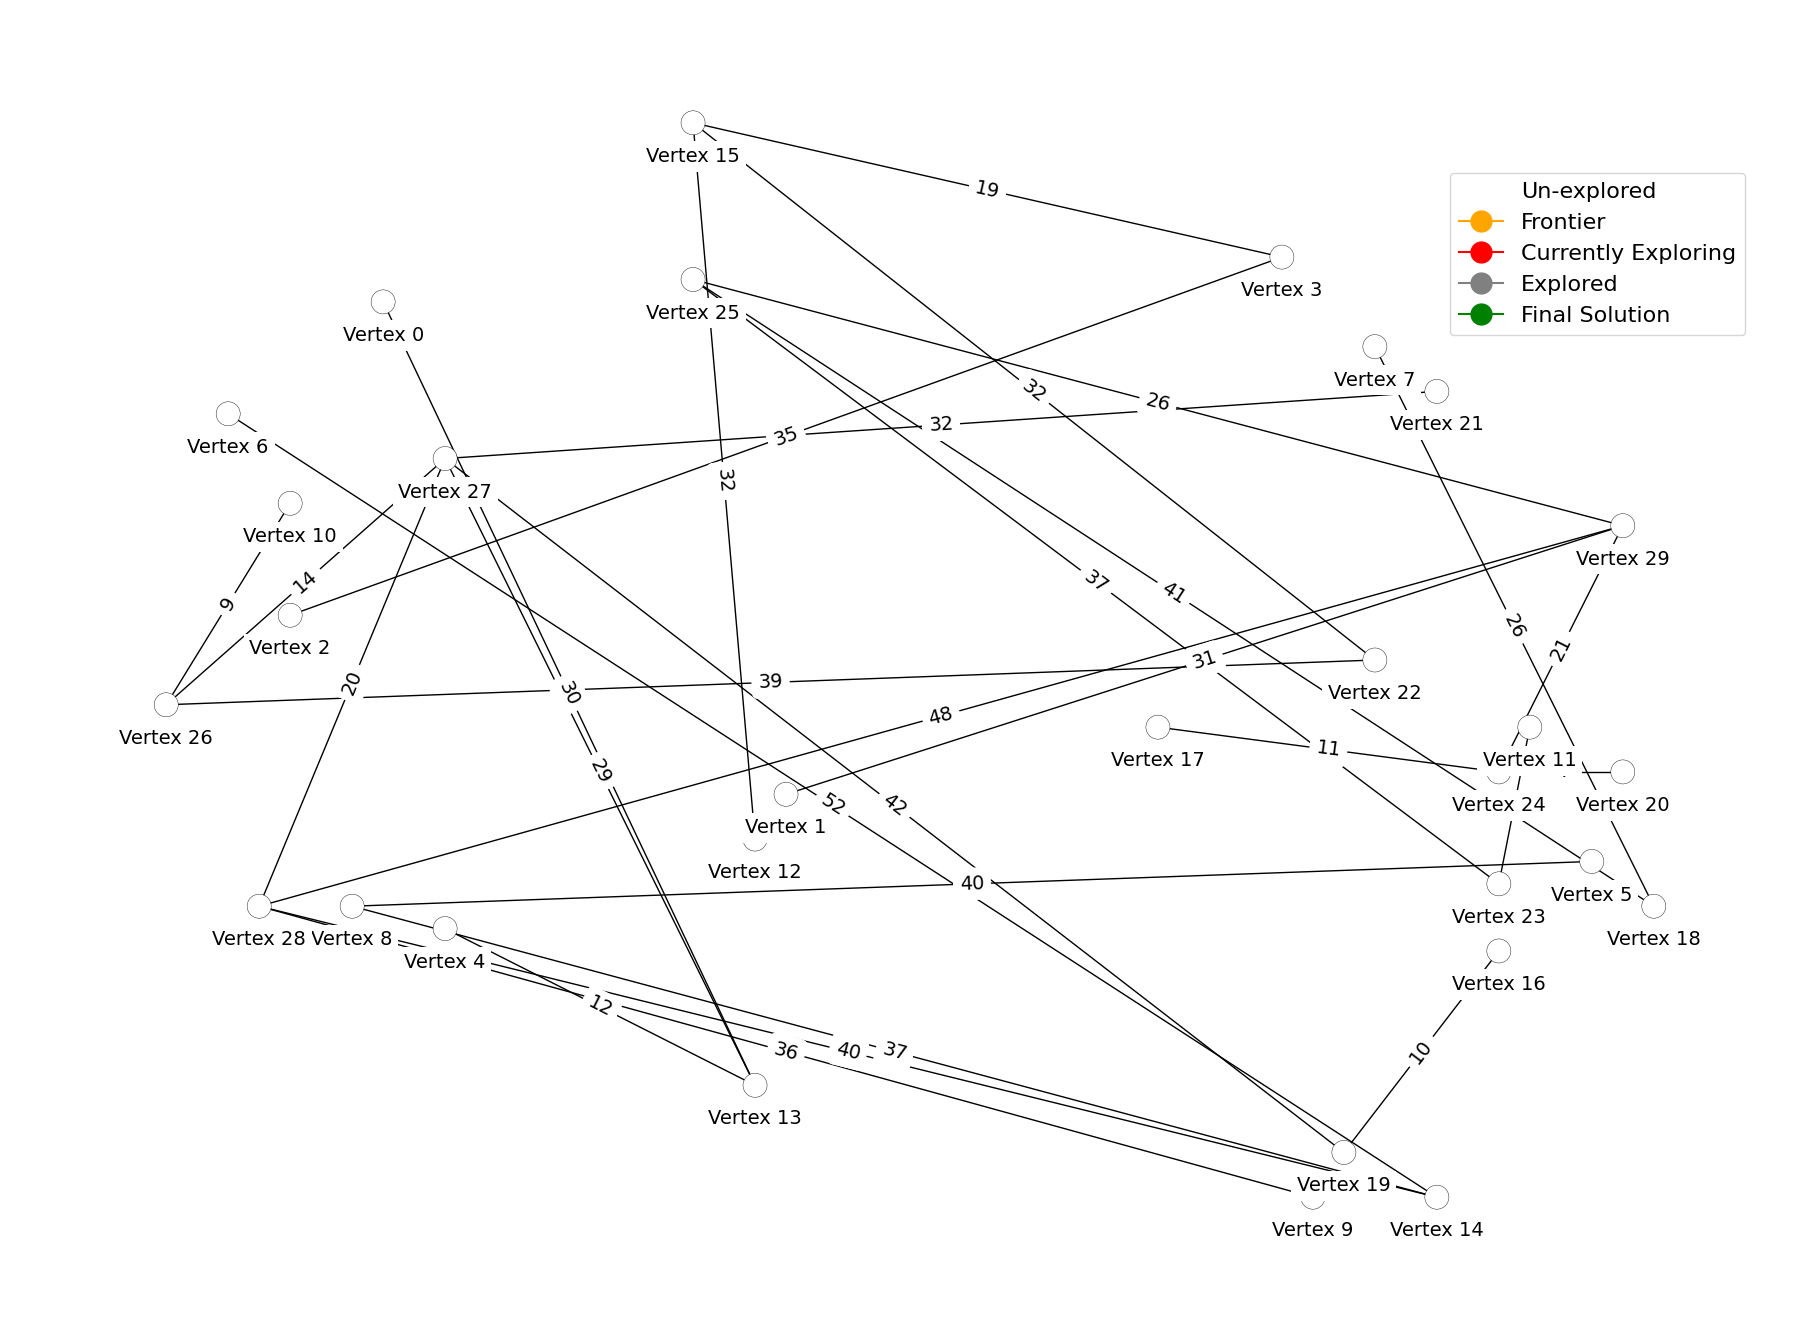

In [10]:
# Visualizing the graph
show_map(graph_data)

#### BREADTH FIRST GRAPH SEARCH
The code for BFS on graphs is given in below cell

In [11]:
def breadth_first_search_graph(problem):
    "[Figure 3.11] in text"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [12]:
all_node_colors = []

In [13]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
graph_problem = GraphProblem('Vertex 1', 'Vertex 10', graph)

In [14]:
display_visual(graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=graph_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

#### DEPTH FIRST GRAPH SEARCH

In [15]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = graph_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [16]:
all_node_colors = []

In [17]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
graph_problem = GraphProblem('Vertex 1', 'Vertex 10', graph)

In [18]:
display_visual(graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=graph_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

#### UNIFORM COST SEARCH

In [19]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < incumbent:
                    del frontier[child]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

In [20]:
def uniform_cost_search_graph(problem):
    "[Figure 3.14]"
    #Uniform Cost Search uses Best First Search algorithm with f(n) = g(n)
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)

In [21]:
all_node_colors = []

In [22]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
graph_problem = GraphProblem('Vertex 1', 'Vertex 10', graph)

In [23]:
display_visual(graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=graph_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

#### A* SEARCH

In [24]:
def astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)


In [25]:
all_node_colors = []

In [26]:
# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
graph_problem = GraphProblem('Vertex 1', 'Vertex 10', graph)

#### Heuristics for A* - run only one cell from the below 3 at a time 

In [27]:
#EUCLIDEAN_HEURISTIC
# Function to calculate Euclidean distance between two nodes
def euclidean_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

# Function to calculate the heuristic value (Euclidean distance to a goal node)
def euclidean_heuristic(self, node):
    locs = getattr(self.graph, 'locations', None)
    if locs:
        if type(node) is str:
            return int(euclidean_distance(locs[node], locs[self.goal]))

        return int(euclidean_distance(locs[node.state], locs[self.goal]))
    else:
        return np.inf

# Overriding the h function for GraphProblem instance to define the heuristic for each node
graph_problem.h = types.MethodType(euclidean_heuristic, graph_problem)

In [28]:
#MANHATTAN_HEURISTIC
# Function to calculate Manhattan distance between two nodes
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

# Function to calculate the heuristic value (Manhattan distance to a goal node)
def manhattan_heuristic(self, node):
    locs = getattr(self.graph, 'locations', None)
    if locs:
        if type(node) is str:
            return int(manhattan_distance(locs[node], locs[self.goal]))

        return int(manhattan_distance(locs[node.state], locs[self.goal]))
    else:
        return np.inf

# Overriding the h function for GraphProblem instance to define the heuristic for each node
graph_problem.h = types.MethodType(manhattan_heuristic, graph_problem)

In [29]:
#UNIFORM_HEURISTIC

# Function to calculate the heuristic value
def uniform_heuristic(self, node):
    return 0

# Overriding the h function for GraphProblem instance to define the heuristic for each node
graph_problem.h = types.MethodType(uniform_heuristic, graph_problem)

In [30]:
display_visual(graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem=graph_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

### Problem 2 questions:
Compare the visualizations for BFS, DFS, UCS and A* in terms of:
1. number of nodes in final path, 
2. final path result 
4. path cost
5. heuristic comparisons for A* only - euclidean, manhattan, uniform (0)

In [31]:
# Use this cell to write the answer

## Question 3: Implement path function for search traversals on a 10 v 10 map (30 pts)

In [32]:
# Loading map dictionary, node positions and obstacle positions from pickel files

#Loading the graph_dict structure for the map
with open("map_dict.pkl", "rb") as f:
    map_dict = pkl.load(f)

#Loading the node positions for the map - `graph.locations`
with open("map_pos.pkl", "rb") as f:
    map_pos = pkl.load(f)

#Loading the obstacle positions for the map - required for the visualize function below
with open("obstacle_pos.pkl", "rb") as f:
    obstacle_pos = pkl.load(f)

In [33]:
# Fill appropriate arguments for this cell - write your code here
map_graph = UndirectedGraph(map_dict)
map_graph.locations = map_pos

In [34]:
initial_pos = (0,0)
goal_pos = (9,9)

# Fill appropriate arguments for the GraphProblem instance in this cell - write your code here
map_graph_problem = GraphProblem(initial_pos, goal_pos, map_graph)

In [35]:
def convert_to_nx_graph(graph_dict, locations):
    G = nx.Graph()

    # Add nodes and edges
    for node, neighbors in graph_dict.items():
        G.add_node(node, pos=locations[node])
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

In [36]:
# Helper function to visualize map with path returned and obstacles
def visualize_graph(start=None, goal=None, path=None, title = "Random Graph Visualization"):
    """
    start: (x,y) coordinate of start point
    goal: (x,y) coordinate of goal point
    path = Alist of tuples haveing x,y coordinates of path traversed by algorithm
    An example of the function parameters and its execution with a random path is given below
    """
    if map_dict and map_pos and obstacle_pos:
        obstacle_positions = obstacle_pos
        G = convert_to_nx_graph(map_dict, map_pos)
        pos = {(x, y): (y, -x) for x, y in G.nodes()}  # Map grid coordinates to (x, y) for better visualization

        # Set the figsize to 15 x 15
        plt.figure(figsize=(15, 15))

        # Draw nodes and edges
        nx.draw(G, pos, with_labels=True, node_size=50, node_color='lightblue')
        edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        # Plot obstacles as separate points with s=2000
        obstacle_x, obstacle_y = zip(*obstacle_positions)
        plt.scatter(obstacle_y, [-x for x in obstacle_x], c='red', marker='X', s=200, label='Obstacle')

        if start:
            plt.scatter(start[1], -start[0], c='green', marker='o', s=200, label='Start')
        if goal:
            plt.scatter(goal[1], -goal[0], c='blue', marker='s', s=200, label='Goal')

        if path:
            path_x, path_y = zip(*path)
            plt.plot(path_y, [-x for x in path_x], c='orange', linewidth=2, label='Path')

        legend = plt.legend(loc='best', fontsize=15) 

        plt.title(title)
        plt.gca().invert_yaxis()  # Invert y-axis to match grid coordinates

        # Set the legend title font size
        legend.set_title("Legend", prop={'size': 20})

        plt.xticks(range(11))
        plt.yticks(range(-11, 1))
        plt.gca().set_xticklabels([])
        plt.gca().set_yticklabels([])
        plt.gca().xaxis.set_ticks_position('none')
        plt.gca().yaxis.set_ticks_position('none')

        plt.show()
    else:
        print("map_dict, map_pos and obstacle_pos not read from pickle files above")


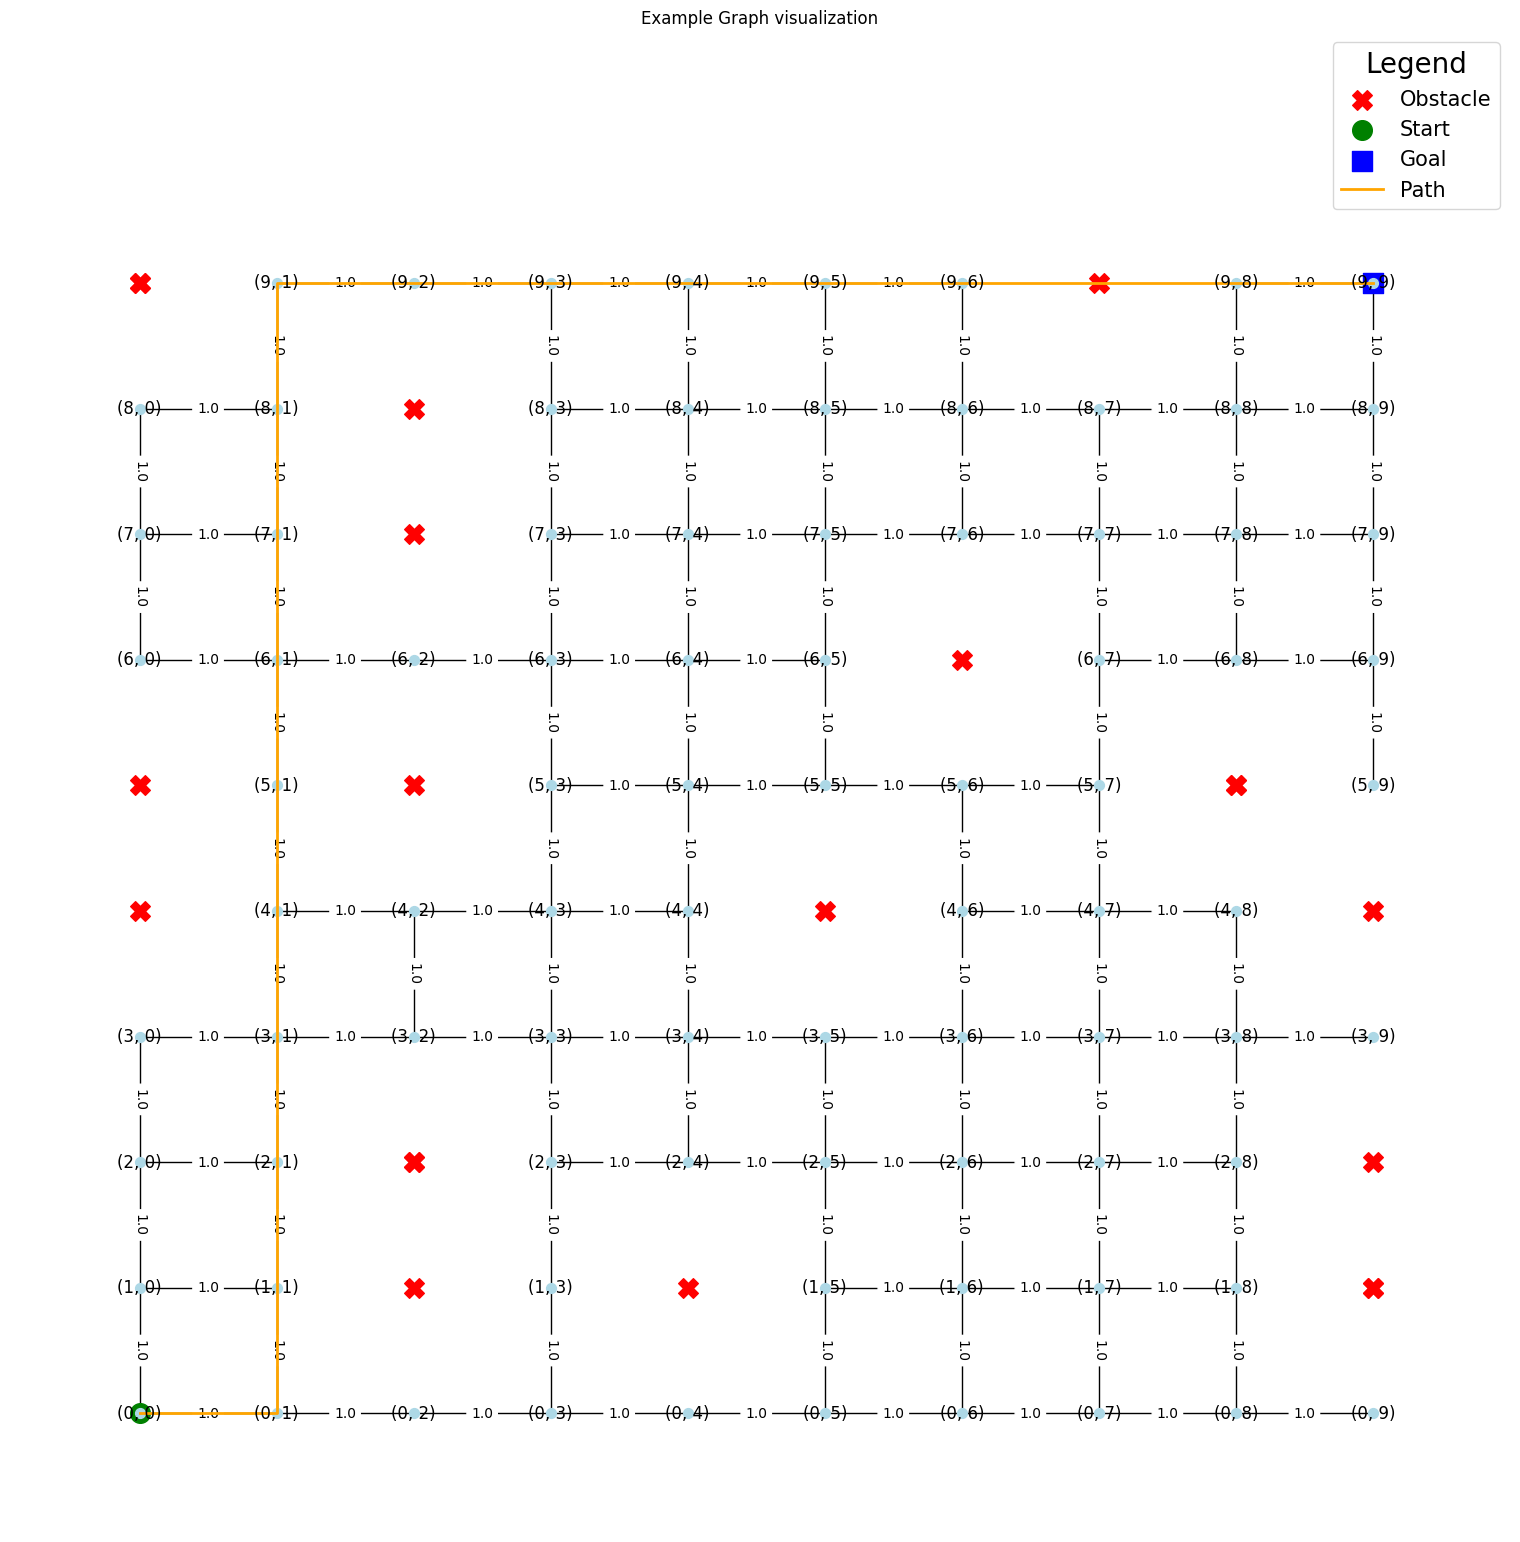

In [37]:
path_to_visualize = [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
visualize_graph(start=initial_pos, goal=goal_pos, path=path_to_visualize, title = "Example Graph visualization")

In [38]:
#Functions to generate path from path_dict and path cost from path
def generate_path_and_cost(path_dict, goal_state):
    path = [goal_state]
    while goal_state in path_dict:
        goal_state = path_dict[goal_state]
        path.insert(0, goal_state)
    return path, generate_path_cost(path)

def generate_path_cost(path):
    cost = 0
    for i in range(len(path)-1):
        src = path[i]
        dst = path[i+1]
        cost += map_dict[src][dst]
    return cost

### BFS

##### Modify the below code to return:
1. Number of nodes explored at the end
2. A dictionary containing all the nodes visited in its order until the goal node from the start node - this is then used to generate the path using the `generate_path` function provided above
3. **Hint** for implementing the path dictionary - Store child node as key, and parent node as the value at each iteration

In [39]:
def graph_breadth_first_search(problem):
    """
    Breadth first search on graphs
    problem: GraphProblem instance
    """
    dict = {}
    explored_count = 0

    node = Node(problem.initial)
    if problem.goal_test(node.state):
        # return node
        explored_count += 1
        return explored_count, 0
    frontier = deque([node])
    explored = set()
    while frontier:
        node = frontier.popleft()
        explored.add(node.state)
        explored_count += 1
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                dict[child.state] = node.state
                if problem.goal_test(child.state):
                    return explored_count, dict
                frontier.append(child)
    return None


In [58]:
# Returning the values:
#     explored_nodes: Number of nodes explored at the end
#    path_dict: Dictionary of (k,v) items to generate the path

# write your code here

explored_nodes, path_dict = graph_breadth_first_search(map_graph_problem)
print(explored_nodes)


82


In [59]:
# Uncomment this cell once the path_dict is implemented

path, path_cost = generate_path_and_cost(path_dict, goal_pos)
print(path_cost)


18.0


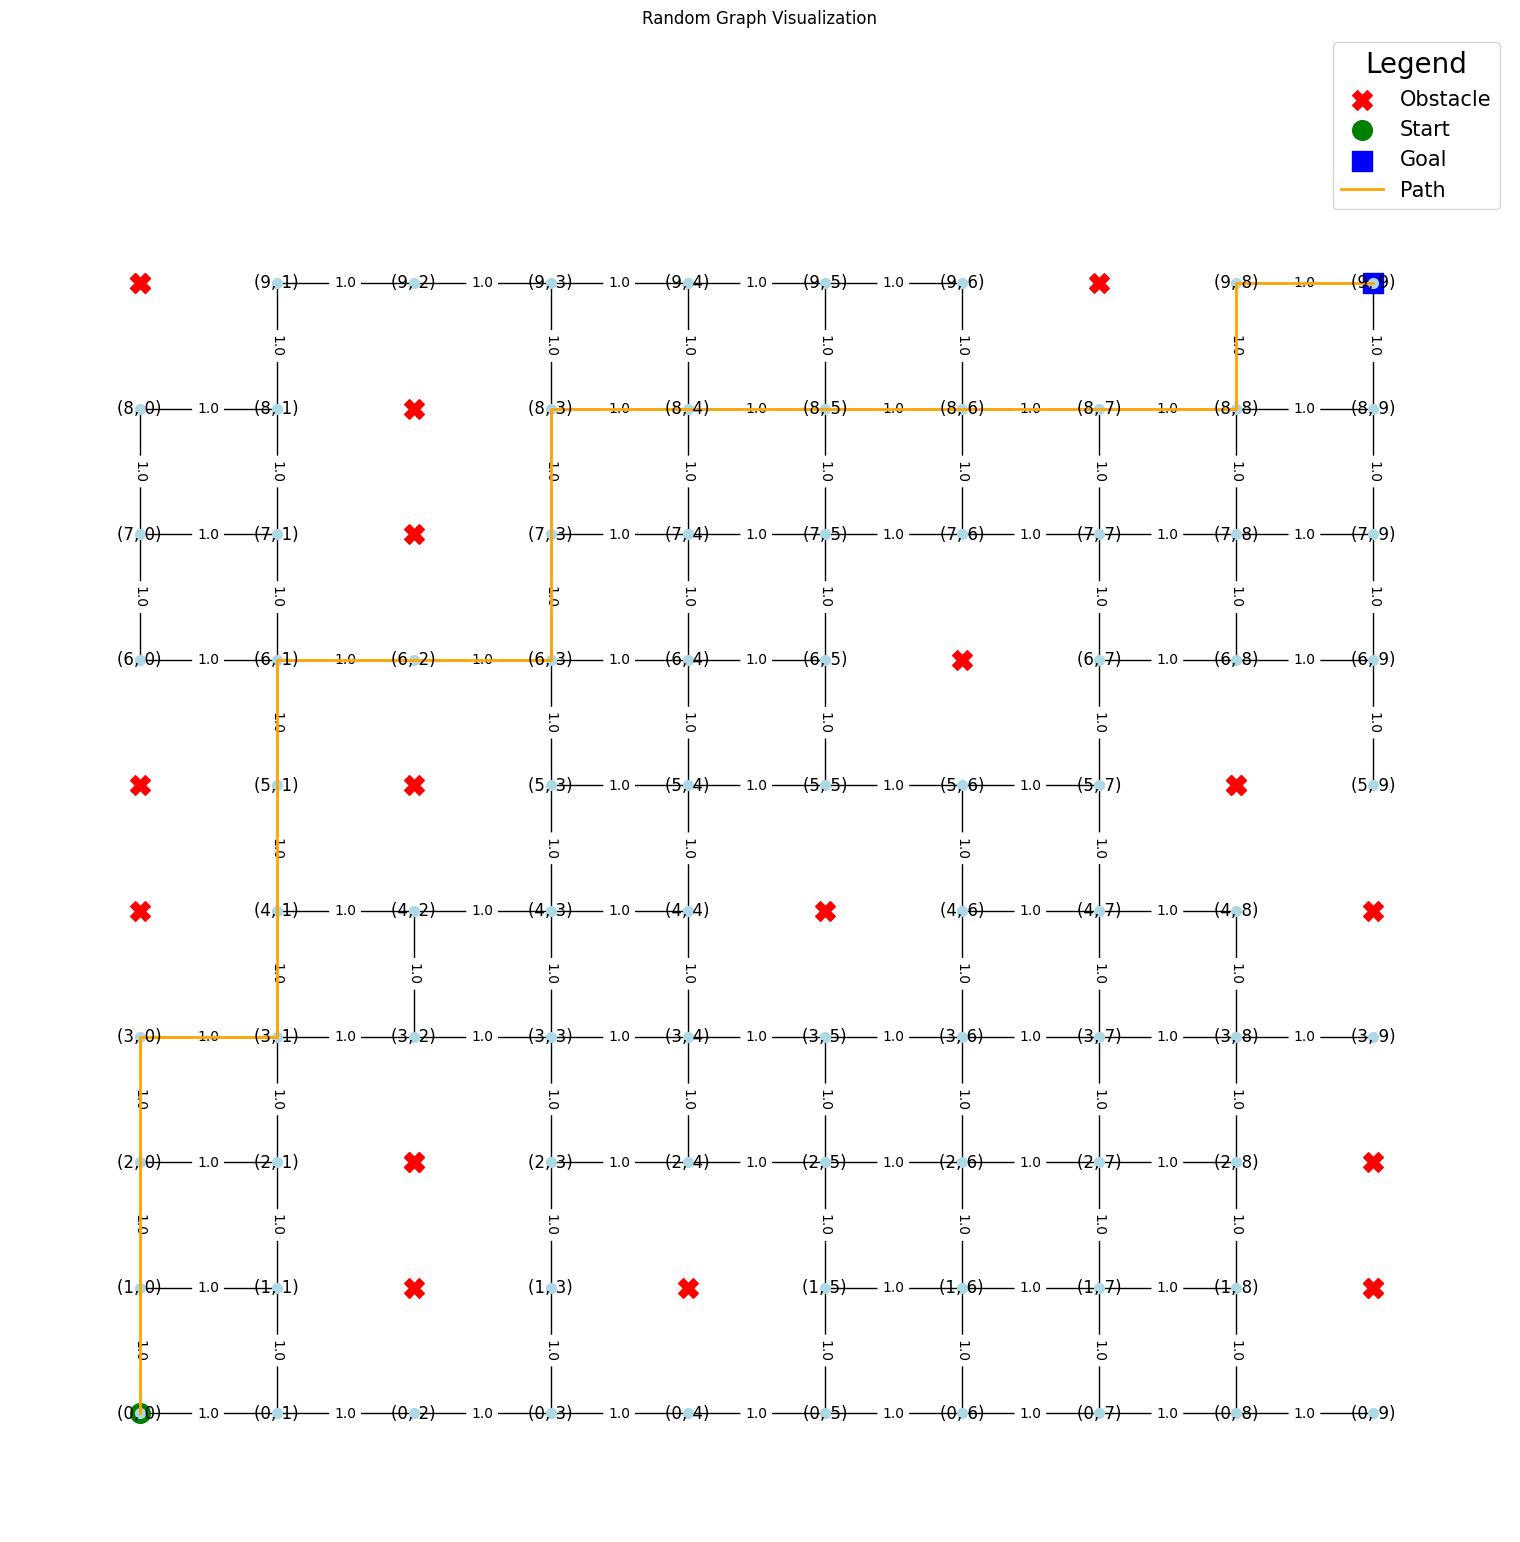

In [42]:
# Uncomment this cell once the path_dict is implemented

visualize_graph(start=initial_pos, goal=goal_pos, path=path)

### DFS

##### Modify the below code to return:
1. Number of nodes explored at the end
2. A dictionary containing all the nodes visited in its order until the goal node from the start node - this is then used to generate the path using the `generate_path` function provided above
3. **Hint** for implementing the path dictionary - Store child node as key, and parent node as the value at each iteration

In [43]:
def graph_depth_first_search(problem):
    """
    Depth first search on graphs
    problem: GraphProblem instance
    """
    dict = {}
    explored_count = 0
    
    frontier = [(Node(problem.initial))]  # Stack
    explored = set()

    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            explored_count +=1
            return explored_count, dict # Return the path dictionary when the goal state is found

        explored.add(node.state)
        explored_count += 1
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                dict[child.state] = node.state
                frontier.append(child)
    return None


In [56]:
# Returning the values:
#     iter_count: Number of iterations performed in the algorithm
#     explored_nodes: Number of nodes explored at the end
#    path_dict: Dictionary of (k,v) items to generate the path

# write your code here

explored_nodes, path_dict = graph_depth_first_search(map_graph_problem)
print(explored_nodes)

23


In [57]:
# Uncomment this cell once the path_dict is implemented

path, path_cost = generate_path_and_cost(path_dict, goal_pos)
print(path_cost)

20.0


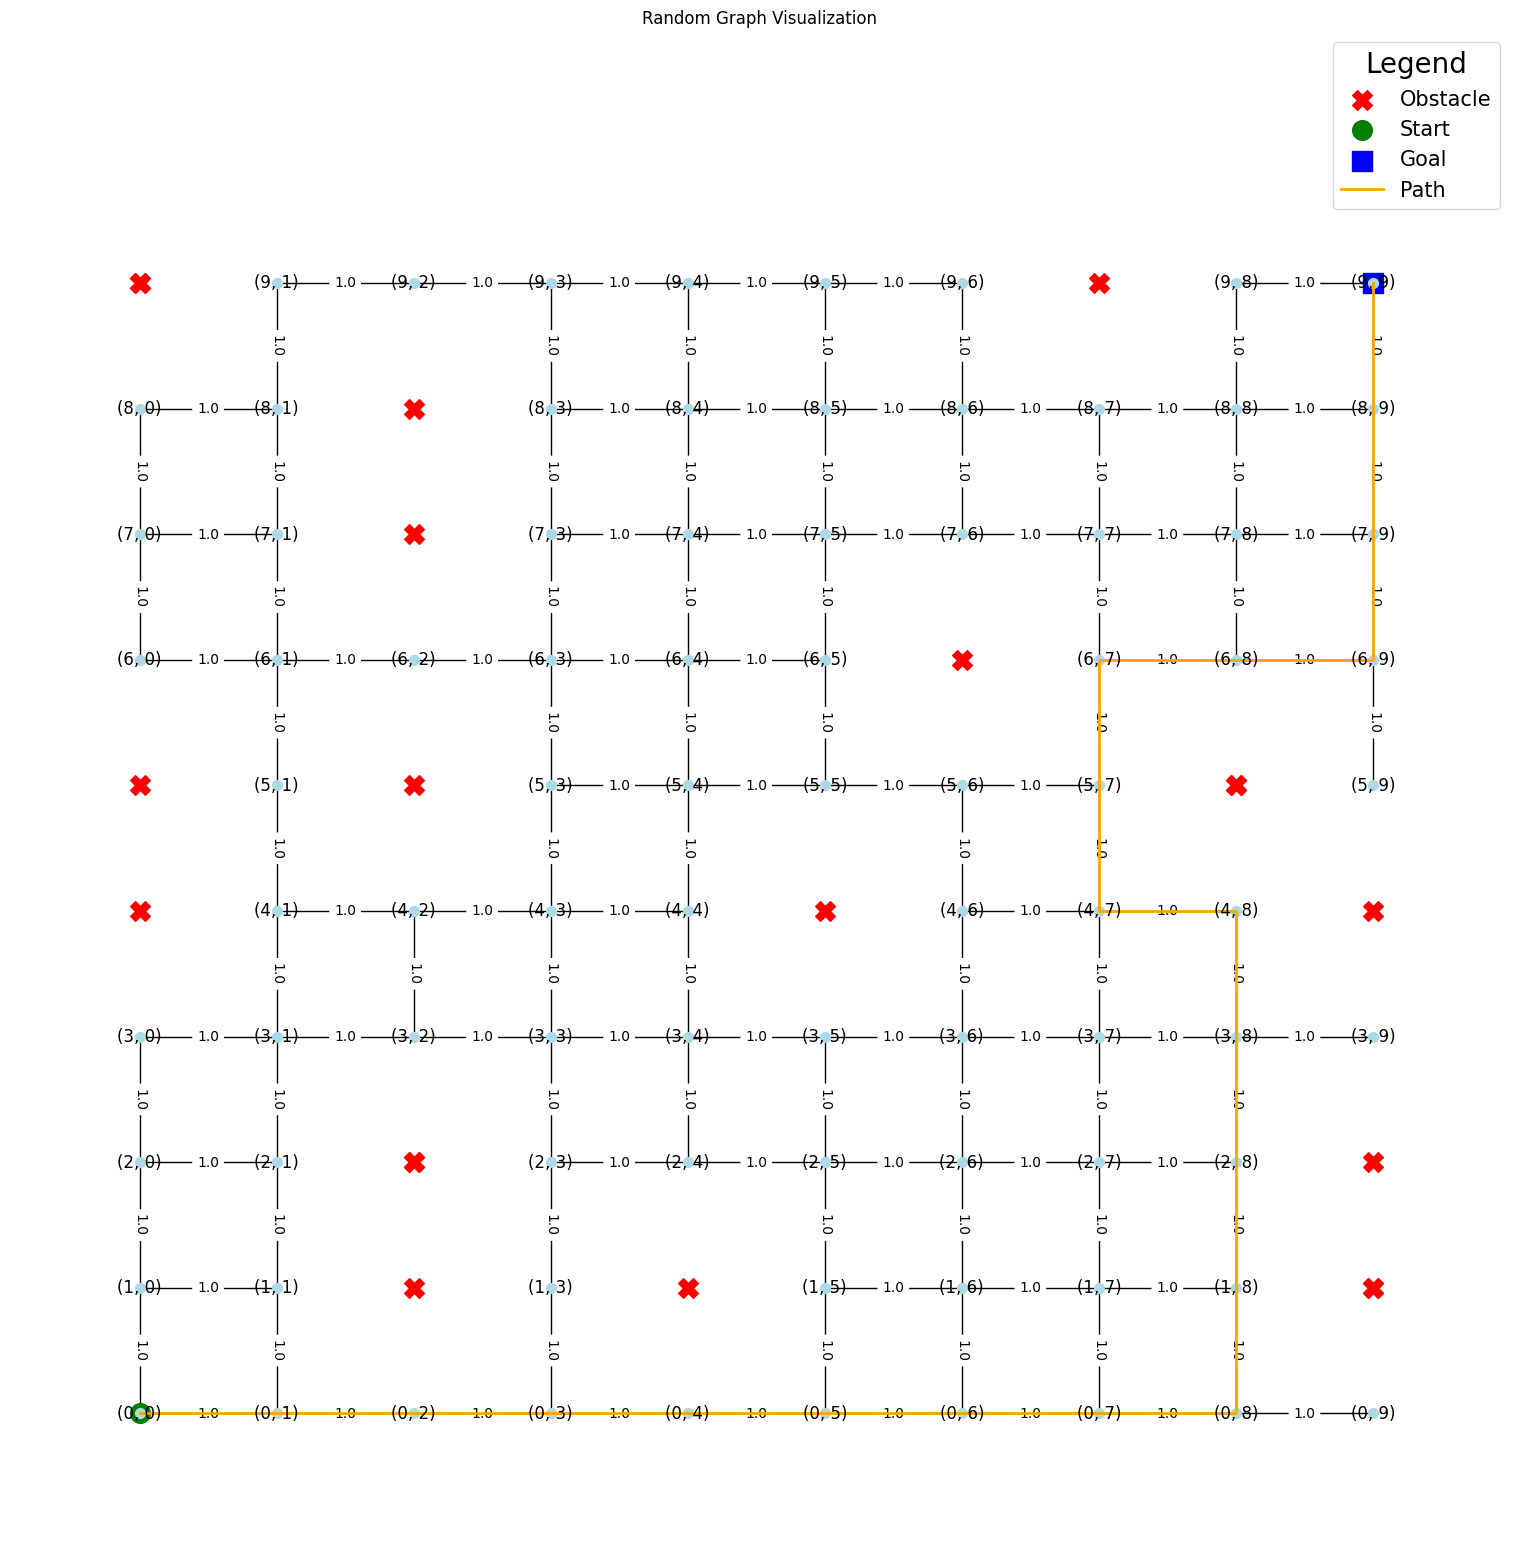

In [46]:
# Uncomment this cell once the path_dict is implemented

visualize_graph(start=initial_pos, goal=goal_pos, path=path)

### A* with Euclidean Heuristic

##### Modify the below code to return:
1. Number of nodes explored at the end
2. A dictionary containing all the nodes visited in its order until the goal node from the start node - this is then used to generate the path using the `generate_path` function provided above
3. **Hint** for implementing the path dictionary - Store child node as key, and parent node as the value at each iteration

In [47]:
def search_astar(problem, h=None, display=False):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    return graph_best_first_search(problem, lambda n: n.path_cost + h(n), display)

def graph_best_first_search(problem, f, display=False):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    dict = {}
    explored_count = 0
    f = memoize(f, 'f')
    node = Node(problem.initial)
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    explored = set()

    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            if display:
                print(len(explored), "paths have been expanded and", len(frontier), "paths remain in the frontier")
            return explored_count, dict # Return the path dictionary when the goal state is found

        explored.add(node.state)
        explored_count += 1
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                dict[child.state] = node.state
                frontier.append(child)
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)

    return None



In [48]:
#EUCLIDEAN_HEURISTIC
# Function to calculate Euclidean distance between two nodes
def euclidean_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

# Function to calculate the heuristic value (Euclidean distance to a goal node)
def euclidean_heuristic(self, node):
    locs = getattr(self.graph, 'locations', None)
    if locs:
        if type(node) is str:
            return int(euclidean_distance(locs[node], locs[self.goal]))

        return int(euclidean_distance(locs[node.state], locs[self.goal]))
    else:
        return np.inf

map_graph_problem.h = types.MethodType(euclidean_heuristic, map_graph_problem)

In [49]:
# Returning the values:
#     iter_count: Number of iterations performed in the algorithm
#     explored_nodes: Number of nodes explored at the end
#    path_dict: Dictionary of (k,v) items to generate the path

# write your code here

explored_nodes, path_dict = search_astar(map_graph_problem)
print(explored_nodes)

81


In [50]:
# Uncomment this cell once the path_dict is implemented

path, path_cost = generate_path_and_cost(path_dict, goal_pos)
print(path_cost)

18.0


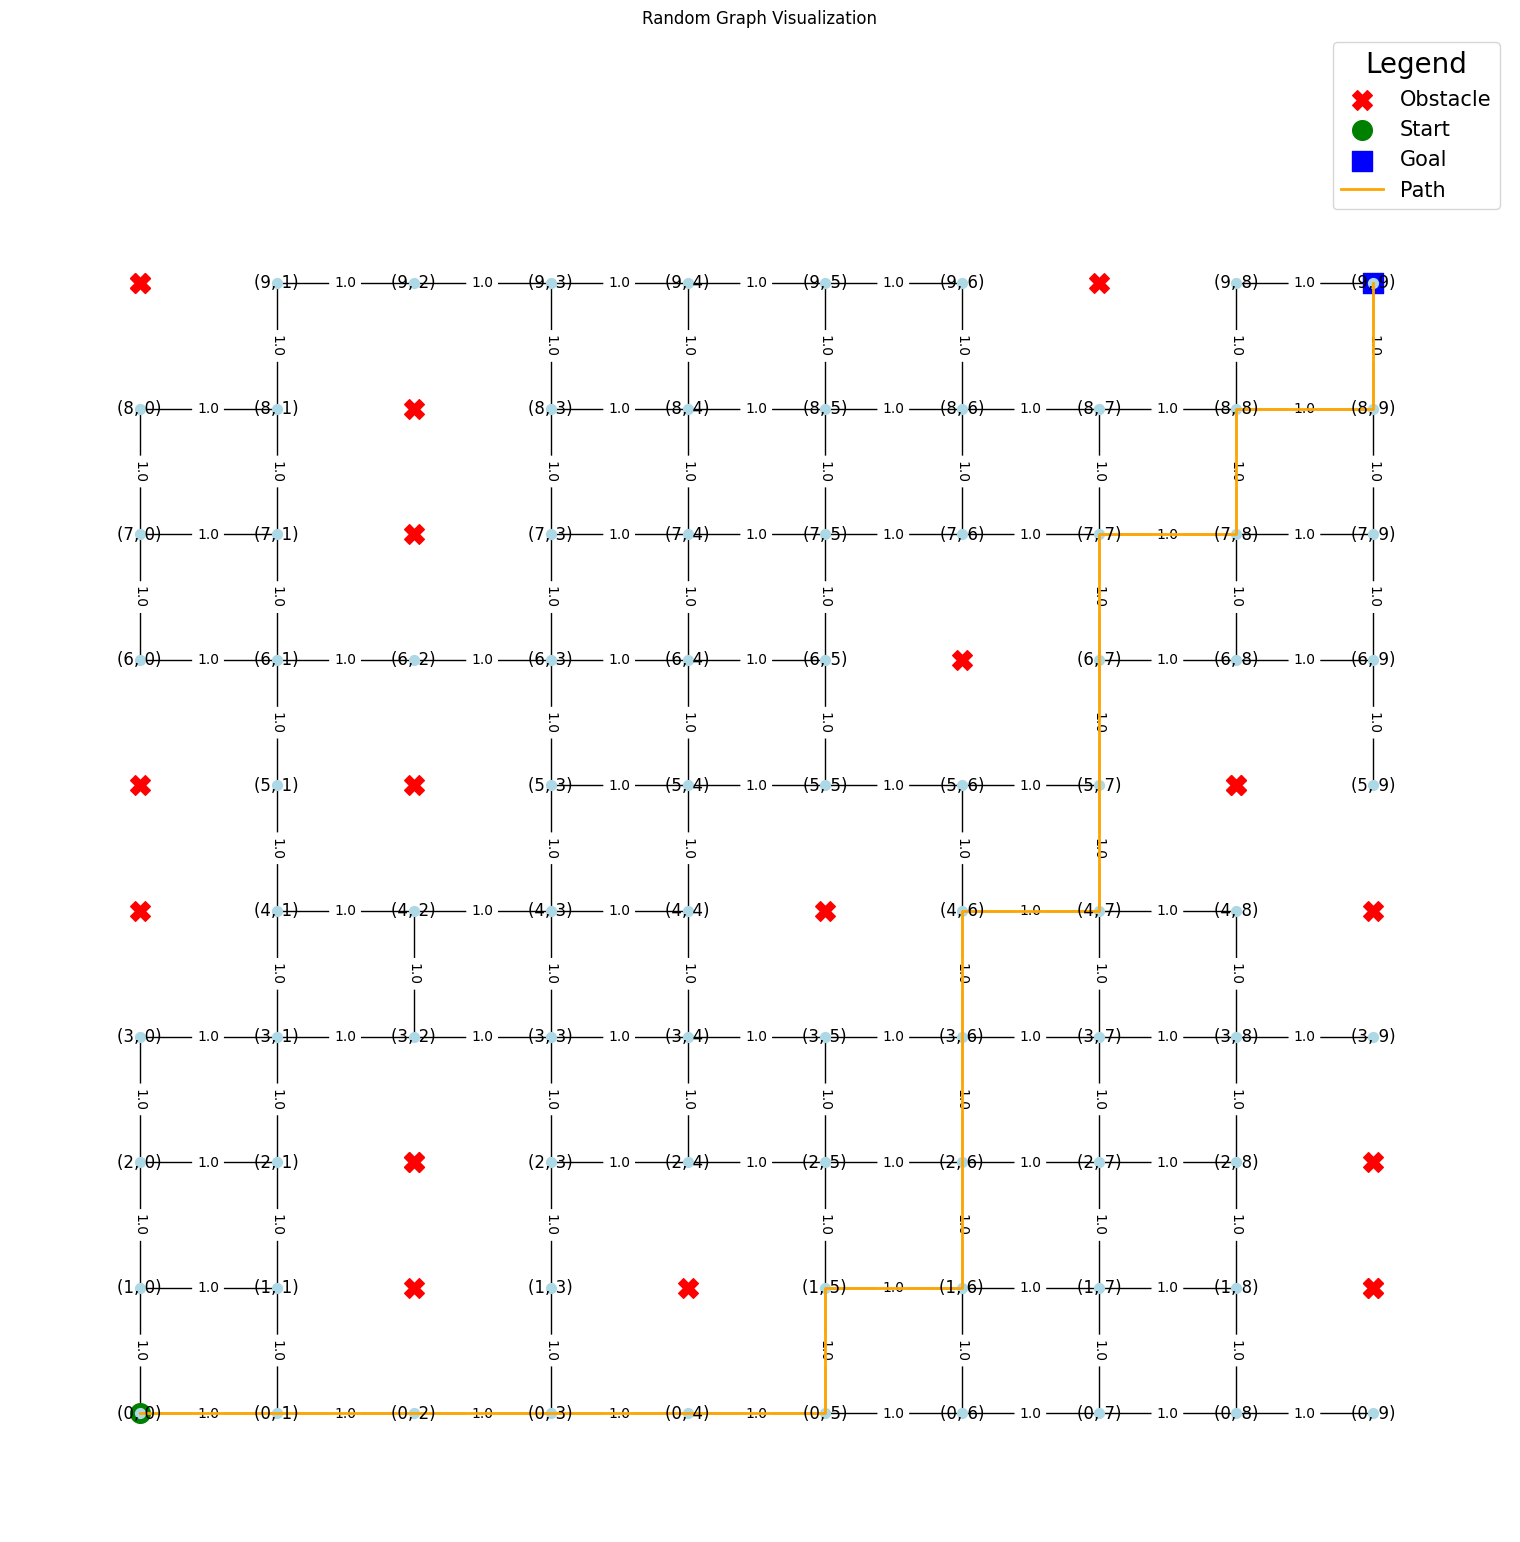

In [51]:
# Uncomment this cell once the path_dict is implemented

visualize_graph(start=initial_pos, goal=goal_pos, path=path)

#### Analysis
Answer the below questions for Problem 3:
1. Compare the paths obtained by the 3 algorithms, and explain why they are similar or why they are different.
2. Compare the path costs
3. Compare the number of explored nodes when the goal is reached for all the 3 algorithms given above

1. The 3 algorithms are all different.
- BFS uses a Queue following a FIFO approach when it comes to which nodes are to be expanded
- DFS uses a Stack following a LIFO approach when it comes to which nodes are to be expanded
- A* with Euiclidian Distance also uses  a queue, however it also uses a heuristic for each node which is the estimated distance from that node, directly to the goal node. It will always pick the node with the least path cost + that nodes heuristic.

2. Both BFS and A* with Euclidian distance have a path cost of 18, DFS ends up having a path cost of 20

3. BFS explored 82 nodes, DFS explored 23 nodes, A* with Euclidian Distance explored 81 nodes
